In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


#nueral

cnn---->convolutional neural networks

conda install tensorflow python=3.7

conda install pip

pip3 install --upgrade tensorflow

conda install keras

In [2]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [3]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(activation = 'relu',units=128))
classifier.add(Dense(activation = 'sigmoid',units=1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
import os 
os.getcwd()
os.chdir(r'C:\Users\YAKUB\Desktop\brain_tumor_detection\Brain_tumor')
print(os.getcwd())

C:\Users\YAKUB\Desktop\brain_tumor_detection\Brain_tumor


In [6]:
training_set = train_datagen.flow_from_directory(r'C:\Users\YAKUB\Desktop\projects\deeeplearning-project\Brain_tumor\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\YAKUB\Desktop\projects\deeeplearning-project\Brain_tumor\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 22 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [7]:
classifier.fit_generator(training_set, steps_per_epoch=None, epochs=100, verbose=1, callbacks=None, validation_data=test_set, validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)
     

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.6763 - accuracy: 0.5909 - val_loss: 0.7527 - val_accuracy: 0.1429
Epoch 2/100
1/1 [==============================] - 1s 507ms/step - loss: 0.6308 - accuracy: 0.7273 - val_loss: 0.9074 - val_accuracy: 0.5714
Epoch 3/100
1/1 [==============================] - 0s 417ms/step - loss: 0.9352 - accuracy: 0.5909 - val_loss: 0.9027 - val_accuracy: 0.2857
Epoch 4/100
1/1 [==============================] - 0s 424ms/step - loss: 0.6780 - accuracy: 0.4545 - val_loss: 0.9220 - val_accuracy: 0.2857
Epoch 5/100
1/1 [==============================] - 0s 399ms/step - loss: 0.6959 - accuracy: 0.5000 - val_loss: 0.7964 - val_accuracy: 0.4286
Epoch 6/100
1/1 [==============================] - 0s 379ms/step - loss: 0.5731 - accuracy: 0.6818 - val_loss: 0.7309 - val_accuracy: 0.4286
Epoch 7/100
1/1 [==============================] - 0s 430ms/step - loss: 0.5731 - accuracy: 0.7273 - val_loss: 0.7265 - val_accuracy: 0.5714
Epoch 8/100
1/1 

Epoch 59/100
1/1 [==============================] - 0s 412ms/step - loss: 0.0666 - accuracy: 1.0000 - val_loss: 2.8851 - val_accuracy: 0.5714
Epoch 60/100
1/1 [==============================] - 0s 336ms/step - loss: 0.0568 - accuracy: 1.0000 - val_loss: 3.0232 - val_accuracy: 0.4286
Epoch 61/100
1/1 [==============================] - 0s 440ms/step - loss: 0.2091 - accuracy: 0.9091 - val_loss: 3.0029 - val_accuracy: 0.4286
Epoch 62/100
1/1 [==============================] - 0s 316ms/step - loss: 0.0487 - accuracy: 1.0000 - val_loss: 3.0086 - val_accuracy: 0.4286
Epoch 63/100
1/1 [==============================] - 0s 466ms/step - loss: 0.1634 - accuracy: 0.9091 - val_loss: 3.0000 - val_accuracy: 0.4286
Epoch 64/100
1/1 [==============================] - 0s 328ms/step - loss: 0.0907 - accuracy: 0.9545 - val_loss: 2.9124 - val_accuracy: 0.4286
Epoch 65/100
1/1 [==============================] - 0s 321ms/step - loss: 0.1027 - accuracy: 0.9545 - val_loss: 2.7104 - val_accuracy: 0.4286
Epoch 

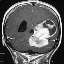

In [8]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\YAKUB\Desktop\brain_tumor_detection\TestImages\brain-tumors-fig2_large.jpg', target_size = (64, 64))
test_image

In [9]:
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)
test_image

array([[[[57., 57., 57.],
         [11., 11., 11.],
         [11., 11., 11.],
         ...,
         [11., 11., 11.],
         [11., 11., 11.],
         [10., 10., 10.]],

        [[14., 14., 14.],
         [14., 14., 14.],
         [11., 11., 11.],
         ...,
         [10., 10., 10.],
         [10., 10., 10.],
         [ 9.,  9.,  9.]],

        [[12., 12., 12.],
         [10., 10., 10.],
         [11., 11., 11.],
         ...,
         [11., 11., 11.],
         [11., 11., 11.],
         [11., 11., 11.]],

        ...,

        [[63., 63., 63.],
         [60., 60., 60.],
         [93., 93., 93.],
         ...,
         [11., 11., 11.],
         [11., 11., 11.],
         [11., 11., 11.]],

        [[23., 23., 23.],
         [ 5.,  5.,  5.],
         [ 8.,  8.,  8.],
         ...,
         [11., 11., 11.],
         [11., 11., 11.],
         [11., 11., 11.]],

        [[13., 13., 13.],
         [13., 13., 13.],
         [15., 15., 15.],
         ...,
         [ 9.,  9.,  9.],
        

In [10]:
result = classifier.predict(test_image)
result

array([[1.]], dtype=float32)

In [11]:
training_set.class_indices

{'Benign': 0, 'Malignant': 1}

In [13]:
if result[0][0] == 0:
    prediction = 'Benign'
else:
    prediction = 'Malignent'
print("Detected tumor type is %s"%prediction)


Detected tumor type is Malignent
